# Análisis Estadístico del Dataset

In [ ]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm


In [ ]:
base_dir = "/home/anna/TFM/TFM-Radiomica/U-Net---Biomedical-Image-Segmentation/data"
original_dir = os.path.join(base_dir, "Organized_Cancer_Controles")
resized_dir = os.path.join(base_dir, "Resized_Organized_Cancer_Controles")


Características básicas de cada imagen

In [3]:
def extract_image_stats(image_path):
    image = Image.open(image_path)
    np_image = np.array(image)
    stats = {
        "file_path": image_path,
        "width": image.width,
        "height": image.height,
        "channels": 1 if len(np_image.shape) == 2 else np_image.shape[2],
        "min_pixel": np.min(np_image),
        "max_pixel": np.max(np_image),
        "dtype": np_image.dtype
    }
    return stats


In [4]:
def analyze_dataset(root_dir):
    stats_list = []

    for case_id in os.listdir(root_dir):
        case_path = os.path.join(root_dir, case_id)
        if not os.path.isdir(case_path):
            continue

        images_path = os.path.join(case_path, "images")
        masks_path = os.path.join(case_path, "masks")

        for img_file in os.listdir(images_path):
            img_full_path = os.path.join(images_path, img_file)
            stats_list.append(extract_image_stats(img_full_path))

        for mask_file in os.listdir(masks_path):
            mask_full_path = os.path.join(masks_path, mask_file)
            stats_list.append(extract_image_stats(mask_full_path))

    return pd.DataFrame(stats_list)


Mostrar resumen estadístico

In [ ]:
df_original = analyze_dataset(original_dir)
df_resized = analyze_dataset(resized_dir)

# Resumen estadístico general

display(df_original.describe(include='all'))
display(df_resized.describe(include='all'))


,file_path,width,height,channels,min_pixel,max_pixel,dtype
count,644,644.0,644.0,644.0,644.000000,644.000000,644
unique,644,NaN,NaN,NaN,NaN,NaN,1
top,/home/anna/TFM/TFM-Radiomica/U-Net---Biomedica...,NaN,NaN,NaN,NaN,NaN,uint8
freq,1,NaN,NaN,NaN,NaN,NaN,644
mean,NaN,250.0,250.0,3.0,2.386646,249.993789,NaN
std,NaN,0.0,0.0,0.0,6.504302,12.277252,NaN
min,NaN,250.0,250.0,3.0,0.000000,158.000000,NaN
25%,NaN,250.0,250.0,3.0,0.000000,255.000000,NaN
50%,NaN,250.0,250.0,3.0,0.000000,255.000000,NaN
75%,NaN,250.0,250.0,3.0,1.000000,255.000000,NaN


,file_path,width,height,channels,min_pixel,max_pixel,dtype
count,644,644.0,644.0,644.0,644.000000,644.000000,644
unique,644,NaN,NaN,NaN,NaN,NaN,1
top,/home/anna/TFM/TFM-Radiomica/U-Net---Biomedica...,NaN,NaN,NaN,NaN,NaN,uint8
freq,1,NaN,NaN,NaN,NaN,NaN,644
mean,NaN,256.0,256.0,3.0,1.830745,250.055901,NaN
std,NaN,0.0,0.0,0.0,6.128808,11.894429,NaN
min,NaN,256.0,256.0,3.0,0.000000,157.000000,NaN
25%,NaN,256.0,256.0,3.0,0.000000,255.000000,NaN
50%,NaN,256.0,256.0,3.0,0.000000,255.000000,NaN
75%,NaN,256.0,256.0,3.0,0.000000,255.000000,NaN


In [8]:
def classify_file_type(file_path):
    if "masks" in file_path:
        return "mask"
    elif "images" in file_path:
        return "image"
    return "unknown"

df_original['type'] = df_original['file_path'].apply(classify_file_type)
df_resized['type'] = df_resized['file_path'].apply(classify_file_type)


In [9]:
def classify_file_type(file_path):
    if "masks" in file_path:
        return "mask"
    elif "images" in file_path:
        return "image"
    return "unknown"

df_original['type'] = df_original['file_path'].apply(classify_file_type)
df_resized['type'] = df_resized['file_path'].apply(classify_file_type)


In [10]:
df_resized.groupby(['type', 'channels']).size().reset_index(name="count")


,type,channels,count
0,image,3,322
1,mask,3,322


Analizamos cuantas imágenes tenemos con lesión y sin lesión para ver si hay alguna sin tumor

In [ ]:
base_path = '/home/anna/TFM/TFM-Radiomica/U-Net---Biomedical-Image-Segmentation/data/Resized_Organized_Cancer_Controles'

empty_masks = 0
non_empty_masks = 0

for folder in os.listdir(base_path):
    mask_dir = os.path.join(base_path, folder, 'masks')
    for mask_file in os.listdir(mask_dir):
        mask_path = os.path.join(mask_dir, mask_file)
        mask = Image.open(mask_path).convert('L')
        mask_array = np.array(mask)
        if np.sum(mask_array > 0) == 0:
            empty_masks += 1
        else:
            non_empty_masks += 1

print(f"Imágenes con lesión: {non_empty_masks}")
print(f"Imágenes sin lesión: {empty_masks}")



Imágenes con lesión: 322
Imágenes sin lesión: 0


Estadísticas para cáncer y para control


--- Estadísticas para Cáncer ---
Número de máscaras analizadas: 120
Área media: 9759.45 px
Área mínima: 3469 px
Área máxima: 23143 px
Desviación estándar: 4691.96 px

--- Estadísticas para Control ---
Número de máscaras analizadas: 202
Área media: 5329.85 px
Área mínima: 822 px
Área máxima: 19797 px
Desviación estándar: 3881.99 px


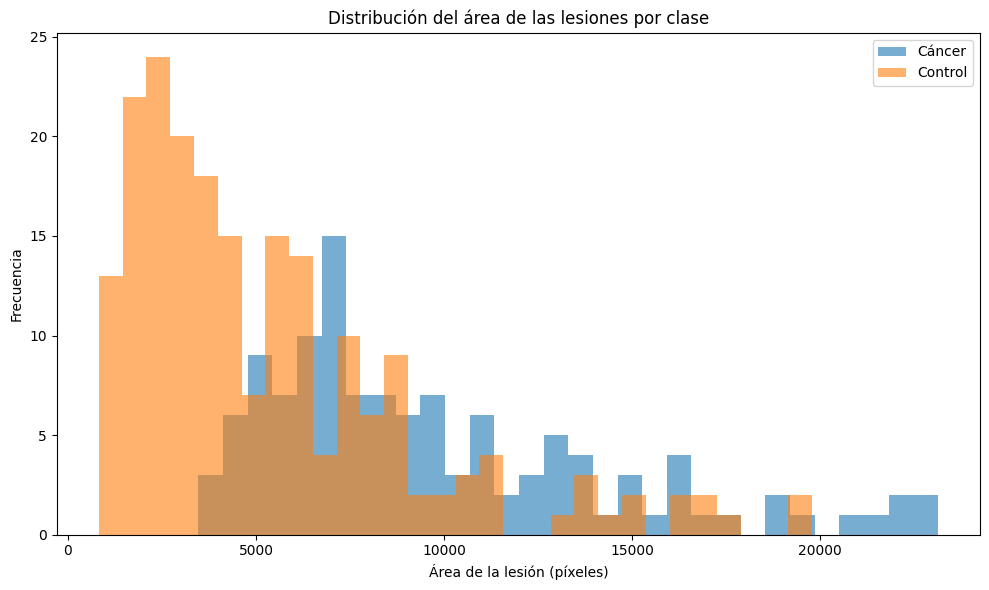

In [ ]:
base_path = "/home/anna/TFM/TFM-Radiomica/U-Net---Biomedical-Image-Segmentation/data/Organized_Cancer_Controles"

lesion_areas_by_class = {
    "Cáncer": [],
    "Control": []
}

for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)
    mask_dir = os.path.join(folder_path, "masks")

    if not os.path.isdir(mask_dir):
        continue

    label = "Cáncer" if folder.endswith("C") else "Control"

    for mask_file in os.listdir(mask_dir):
        mask_path = os.path.join(mask_dir, mask_file)

        mask = Image.open(mask_path).convert('L')
        mask_array = np.array(mask)
        lesion_area = np.sum(mask_array > 0)

        if lesion_area > 0:
            lesion_areas_by_class[label].append(lesion_area)

plt.figure(figsize=(10, 6))

for label, areas in lesion_areas_by_class.items():
    areas = np.array(areas)

    print(f"\n--- Estadísticas para {label} ---")
    print(f"Número de máscaras analizadas: {len(areas)}")
    print(f"Área media: {np.mean(areas):.2f} px")
    print(f"Área mínima: {np.min(areas)} px")
    print(f"Área máxima: {np.max(areas)} px")
    print(f"Desviación estándar: {np.std(areas):.2f} px")

    plt.hist(areas, bins=30, alpha=0.6, label=label)

plt.xlabel("Área de la lesión (píxeles)")
plt.ylabel("Frecuencia")
plt.title("Distribución del área de las lesiones por clase")
plt.legend()
plt.tight_layout()
plt.savefig("hist_area_por_clase.png", dpi=300)
plt.show()



Área media: 7337.22
Área mínima: 860
Área máxima: 24286
Desviación estándar: 4953.69


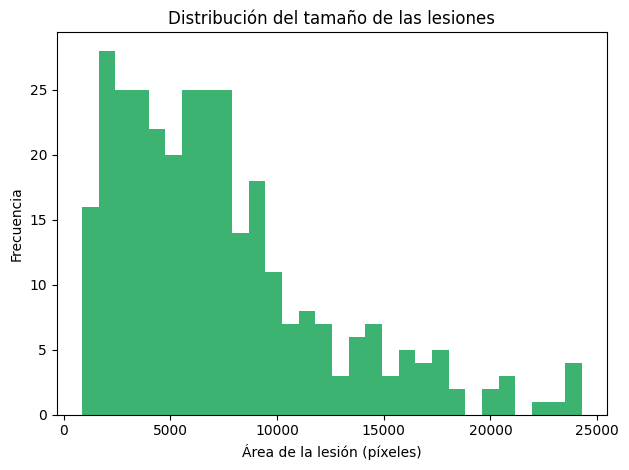

In [ ]:
lesion_areas = []

for folder in os.listdir(base_path):
    mask_dir = os.path.join(base_path, folder, 'masks')
    for mask_file in os.listdir(mask_dir):
        mask_path = os.path.join(mask_dir, mask_file)
        mask = Image.open(mask_path).convert('L')
        mask_array = np.array(mask)
        lesion_area = np.sum(mask_array > 0)
        if lesion_area > 0:
            lesion_areas.append(lesion_area)

areas = np.array(lesion_areas)
print(f"Área media: {np.mean(areas):.2f}")
print(f"Área mínima: {np.min(areas)}")
print(f"Área máxima: {np.max(areas)}")
print(f"Desviación estándar: {np.std(areas):.2f}")

plt.hist(areas, bins=30, color='mediumseagreen')
plt.xlabel("Área de la lesión (píxeles)")
plt.ylabel("Frecuencia")
plt.title("Distribución del tamaño de las lesiones")
plt.tight_layout()
plt.savefig("ist_area.png", dpi=300)
plt.show()


Analizamos como de grande es la zona de la lesión en comparación al resto de la imagen

In [ ]:
mask_dir = "/home/anna/TFM/TFM-Radiomica/U-Net---Biomedical-Image-Segmentation/data/Resized_Organized_Cancer_Controles"

porcentajes_foreground = []

for folder in os.listdir(mask_dir):
    mask_path = os.path.join(mask_dir, folder, "masks")
    for file in os.listdir(mask_path):
        mask = np.array(Image.open(os.path.join(mask_path, file)))
        total_pixels = mask.size
        foreground = np.count_nonzero(mask)
        porcentaje = foreground / total_pixels
        porcentajes_foreground.append(porcentaje)


media_fg = np.mean(porcentajes_foreground) * 100
std_fg = np.std(porcentajes_foreground) * 100

media_bg = 100 - media_fg
std_bg = std_fg  

print(f"Foreground (lesión): {media_fg:.2f}% ± {std_fg:.2f}%")
print(f"Background (fondo): {media_bg:.2f}% ± {std_bg:.2f}%")

Foreground (lesión): 10.49% ± 7.33%
Background (fondo): 89.51% ± 7.33%


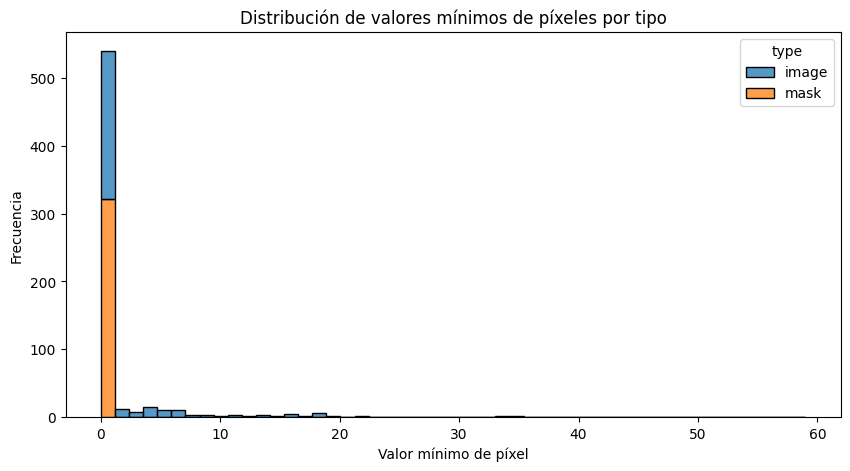

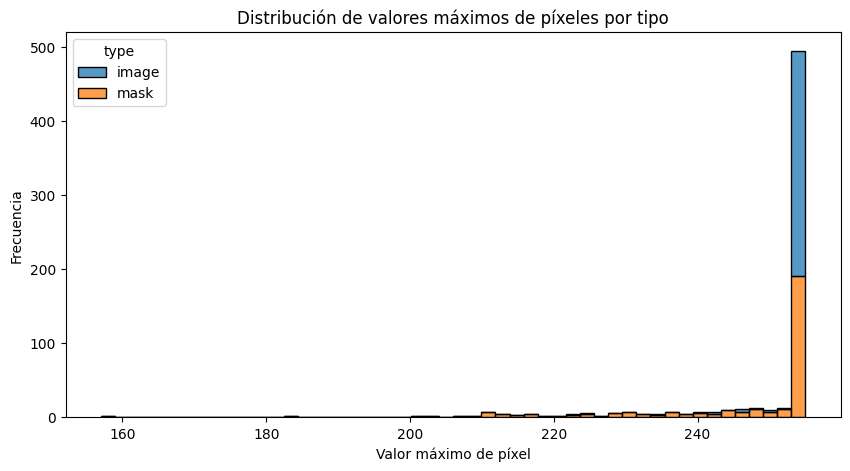

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(data=df_resized, x="min_pixel", hue="type", bins=50, kde=False, multiple="stack", palette=["#1f77b4", "#ff7f0e"])
plt.title("Distribución de valores mínimos de píxeles por tipo")
plt.xlabel("Valor mínimo de píxel")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=df_resized, x="max_pixel", hue="type", bins=50, kde=False, multiple="stack", palette=["#1f77b4", "#ff7f0e"])
plt.title("Distribución de valores máximos de píxeles por tipo")
plt.xlabel("Valor máximo de píxel")
plt.ylabel("Frecuencia")
plt.show()


Hacemos un recuento de cuantas imágenes tengo en cada subconjunto que utilizo para entrenar, validar, testear los modelos

In [ ]:
sample_masks = df_resized[df_resized["type"] == "mask"]["file_path"].sample(20, random_state=42)

binary_check = []
for path in sample_masks:
    img = Image.open(path).convert("L")  
    unique_vals = np.unique(np.array(img))
    binary_check.append((os.path.basename(path), unique_vals))

non_binary = [(name, vals) for name, vals in binary_check if not np.array_equal(vals, [0]) and not np.array_equal(vals, [0, 255])]

non_binary


[('00158_1.png',
  array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
          26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  39,
          40,  41,  42,  43,  44,  46,  47,  48,  49,  50,  51,  53,  54,
          55,  56,  57,  58,  59,  60,  61,  62,  63,  65,  66,  67,  68,
          69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
          82,  83,  84,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
          96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
         109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
         122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
         135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
         148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
         161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
         174, 175, 17

In [ ]:
import os
import random
from collections import Counter

base_path = "/home/anna/TFM/TFM-Radiomica/U-Net---Biomedical-Image-Segmentation/data/Resized_Organized_Cancer_Controles"

subdirs = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]

cancer_cases = [d for d in subdirs if not d.endswith("C")]
control_cases = [d for d in subdirs if d.endswith("C")]

random.seed(42)
random.shuffle(cancer_cases)
random.shuffle(control_cases)

def split_dataset(cases, train_ratio=0.7, val_ratio=0.15):
    total = len(cases)
    train_end = int(train_ratio * total)
    val_end = train_end + int(val_ratio * total)
    return {
        "train": cases[:train_end],
        "val": cases[train_end:val_end],
        "test": cases[val_end:]
    }

cancer_split = split_dataset(cancer_cases)
control_split = split_dataset(control_cases)

counts = {
    "train": {"Cancer": len(cancer_split["train"]), "Control": len(control_split["train"])},
    "val": {"Cancer": len(cancer_split["val"]), "Control": len(control_split["val"])},
    "test": {"Cancer": len(cancer_split["test"]), "Control": len(control_split["test"])}
}

print(f"{'Conjunto':<12} {'Clase':<10} {'Nº Imágenes'}")
print("-" * 34)
for subset in ["train", "val", "test"]:
    for cls in ["Cancer", "Control"]:
        print(f"{subset.capitalize():<12} {cls:<10} {counts[subset][cls]}")

Conjunto     Clase      Nº Imágenes
----------------------------------
Train        Cancer     141
Train        Control    84
Val          Cancer     30
Val          Control    18
Test         Cancer     31
Test         Control    18


Total imágenes con máscara

In [ ]:
def count_images_in_folder(folder_path, extensions={'.png', '.jpg', '.jpeg'}):
    count = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if os.path.splitext(file)[1].lower() in extensions:
                count += 1
    return count

folder = "/home/anna/TFM/TFM-Radiomica/U-Net---Biomedical-Image-Segmentation/data/Resized_Organized_Cancer_Controles"
num_images = count_images_in_folder(folder)
print(f"Número total de imágenes en la carpeta: {num_images}")


Número total de imágenes en la carpeta: 644


Total imágenes del dataset sin máscara

In [ ]:
def count_images_in_folder(folder_path, extensions={'.jpg', '.jpeg', '.png', '.JPG', '.JPEG', '.PNG'}):
    count = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if os.path.splitext(file)[1] in extensions:
                count += 1
    return count

folder = "/home/anna/TFM/TFM-Radiomica/U-Net---Biomedical-Image-Segmentation/data/CasosCáncer_241026"
num_images = count_images_in_folder(folder)
print(f"Número total de imágenes en la carpeta: {num_images}")


Número total de imágenes en la carpeta: 517


In [ ]:
base_path = "/home/anna/TFM/TFM-Radiomica/U-Net---Biomedical-Image-Segmentation/data/Resized_Organized_Cancer_Controles"


cancer_count = 0
control_count = 0

for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)
    
    if not os.path.isdir(folder_path):
        continue 

    is_control = folder.endswith("C")

    images_folder = os.path.join(folder_path, "images")
    
    if os.path.exists(images_folder):
        num_images = len([f for f in os.listdir(images_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        
        if is_control:
            control_count += num_images
        else:
            cancer_count += num_images

print(f"Número total de imágenes de CÁNCER: {cancer_count}")
print(f"Número total de imágenes de CONTROL: {control_count}")


Número total de imágenes de CÁNCER: 202
Número total de imágenes de CONTROL: 120


Hacemos un recuento de las imágenes aumentadas que utilizamos para entrenar nuestro modelo

In [ ]:
import os
from collections import defaultdict

base_path = "/home/anna/TFM/TFM-Radiomica/U-Net---Biomedical-Image-Segmentation/data/Combinado_FINAL_CONTODO"

counts = {
    "Cáncer": {"original": 0, "aumentada": 0},
    "Control": {"original": 0, "aumentada": 0}
}

for entry in os.listdir(base_path):
    entry_path = os.path.join(base_path, entry)
    if not os.path.isdir(entry_path):
        continue

    if entry.endswith("C") or "_aug_" in entry and "C" in entry:
        clase = "Cáncer"
    else:
        clase = "Control"

    if "_aug_" in entry:
        tipo = "aumentada"
    else:
        tipo = "original"

    image_folder = os.path.join(entry_path, "images")
    if os.path.isdir(image_folder):
        images = [f for f in os.listdir(image_folder) if f.endswith(".png")]
        if images:
            counts[clase][tipo] += 1  

print("\n📊 Distribución de imágenes en Combinado_FINAL_CONTODO:\n")
print("{:<10} {:>15} {:>15} {:>15}".format("Clase", "Originales", "Aumentadas", "Total"))
print("-" * 60)
for clase in ["Cáncer", "Control"]:
    orig = counts[clase]["original"]
    aug = counts[clase]["aumentada"]
    total = orig + aug
    print("{:<10} {:>15} {:>15} {:>15}".format(clase, orig, aug, total))
print("-" * 60)
total_all = sum(counts[c]["original"] + counts[c]["aumentada"] for c in counts)
print("{:<10} {:>15} {:>15} {:>15}".format("TOTAL", "", "", total_all))



📊 Distribución de imágenes en Combinado_FINAL_CONTODO:

Clase           Originales      Aumentadas           Total
------------------------------------------------------------
Cáncer                 120             600             720
Control                202            1010            1212
------------------------------------------------------------
TOTAL                                                 1932


In [ ]:
from sklearn.model_selection import train_test_split
import os
from collections import defaultdict

def classify_image(path):
    basename = os.path.basename(path)
    if "C" in basename and "_aug_" not in basename:
        return "Cáncer", "Original"
    elif "C" in basename and "_aug_" in basename:
        return "Cáncer", "Aumentada"
    elif "C" not in basename and "_aug_" not in basename:
        return "Control", "Original"
    elif "C" not in basename and "_aug_" in basename:
        return "Control", "Aumentada"
    else:
        return "Desconocido", "Otro"

cancer_original = [img for img in original_images if "C" in os.path.basename(img) and "_aug_" not in os.path.basename(img)]
control_original = [img for img in original_images if "C" not in os.path.basename(img) and "_aug_" not in os.path.basename(img)]

cancer_train, cancer_temp = train_test_split(cancer_original, test_size=0.3, random_state=42)
cancer_val, cancer_test = train_test_split(cancer_temp, test_size=0.5, random_state=42)

control_train, control_temp = train_test_split(control_original, test_size=0.3, random_state=42)
control_val, control_test = train_test_split(control_temp, test_size=0.5, random_state=42)

augmented_cancer = [img for img in augmented_images if "C" in os.path.basename(img)]
augmented_control = [img for img in augmented_images if "C" not in os.path.basename(img)]

def filter_augmented_by_originals(aug_imgs, train_originals):
    train_basenames = set(os.path.basename(f).split("_aug_")[0] for f in train_originals)
    return [img for img in aug_imgs if os.path.basename(img).split("_aug_")[0] in train_basenames]

augmented_cancer_train = filter_augmented_by_originals(augmented_cancer, cancer_train)
augmented_control_train = filter_augmented_by_originals(augmented_control, control_train)

stats = defaultdict(lambda: defaultdict(int))

stats["Entrenamiento"]["Cáncer_Originales"] = len(cancer_train)
stats["Entrenamiento"]["Cáncer_Aumentadas"] = len(augmented_cancer_train)
stats["Entrenamiento"]["Control_Originales"] = len(control_train)
stats["Entrenamiento"]["Control_Aumentadas"] = len(augmented_control_train)

stats["Validación"]["Cáncer_Originales"] = len(cancer_val)
stats["Validación"]["Cáncer_Aumentadas"] = 0
stats["Validación"]["Control_Originales"] = len(control_val)
stats["Validación"]["Control_Aumentadas"] = 0

stats["Test"]["Cáncer_Originales"] = len(cancer_test)
stats["Test"]["Cáncer_Aumentadas"] = 0
stats["Test"]["Control_Originales"] = len(control_test)
stats["Test"]["Control_Aumentadas"] = 0

for subset in stats:
    for clase in ["Cáncer", "Control"]:
        o = stats[subset].get(f"{clase}_Originales", 0)
        a = stats[subset].get(f"{clase}_Aumentadas", 0)
        stats[subset][f"{clase}_Total"] = o + a

print("Subconjunto\tClase\t\tOriginales\tAumentadas\tTotal")
print("---------------------------------------------------------------")
total_global = 0
for subset in ["Entrenamiento", "Validación", "Test"]:
    for clase in ["Cáncer", "Control"]:
        o = stats[subset].get(f"{clase}_Originales", 0)
        a = stats[subset].get(f"{clase}_Aumentadas", 0)
        t = stats[subset].get(f"{clase}_Total", 0)
        total_global += t
        print(f"{subset:<12}\t{clase:<10}\t{o:<10}\t{a:<10}\t{t}")
print("---------------------------------------------------------------")
print(f"{'TOTAL':<35}{total_global}")


Subconjunto	Clase		Originales	Aumentadas	Total
---------------------------------------------------------------
Entrenamiento	Cáncer    	84        	0         	84
Entrenamiento	Control   	141       	0         	141
Validación  	Cáncer    	18        	0         	18
Validación  	Control   	30        	0         	30
Test        	Cáncer    	18        	0         	18
Test        	Control   	31        	0         	31
---------------------------------------------------------------
TOTAL                              322
